# RNN - Clasificación de Texto
- Objetivo: Implementar RNN y LSTM para la clasificación de secuencias (texto). Aplicar inicialización de pesos y dropout en modelos recurrentes. 

- Conocer efectos de inicialización y dropout en RNN y comparar con MLP


![RNN](img/1.png)

## Redes Neuronales Recurrentes


- Cada capa en cada iteración comparte parámetros

- 'sparse_categorical_crossentropy' se utiliza para varias clases


## Leer Dataset

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, SimpleRNN
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

##  11,228 noticias de Reuters, con más de 46 temas.

In [2]:
# parámetros 
emb_dim = 64
num_words = 8000
max_words = 40


In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = num_words, maxlen=max_words)

In [4]:
x_train.shape

(1084,)

In [5]:
print('Noticia')
print(x_train[0])
print('Etiqueta')
print(y_train[0])

Noticia
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
Etiqueta
3


## Palabras de noticia

In [6]:
wordDict = {y:x for x,y in reuters.get_word_index().items()}  
res = []
for index in x_train[0]:
    res.append(wordDict.get(index - 3))
print('Noticia: ',res,'Longitud noticia: ', len(res))

Noticia:  [None, 'period', 'ended', 'december', '31', 'shr', 'profit', '11', 'cts', 'vs', 'loss', '24', 'cts', 'net', 'profit', '224', '271', 'vs', 'loss', '511', '349', 'revs', '7', '258', '688', 'vs', '7', '200', '349', 'reuter', '3'] Longitud noticia:  31


In [7]:
x_train = pad_sequences(x_train, maxlen=max_words, padding = 'post')
x_test = pad_sequences(x_test, maxlen=max_words, padding = 'post')

In [8]:
epoch = 40
verbose = 1
batch = 50

In [9]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1084, 40)
(272, 40)
(1084,)
(272,)


In [10]:
x_train[0]

array([   1,  245,  273,  207,  156,   53,   74,  160,   26,   14,   46,
        296,   26,   39,   74, 2979, 3554,   14,   46, 4689, 4329,   86,
         61, 3499, 4795,   14,   61,  451, 4329,   17,   12,    0,    0,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)

## Deep RNN 
- Cuando se conectan varias capas de RNNs se modifica el parámetro 'return_sequences'
- Se inicializan los pesos con 'glorot_uniform'

In [11]:
def deep_rnn():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(SimpleRNN(32, return_sequences = True, recurrent_initializer='glorot_uniform'))
    model.add(SimpleRNN(32, return_sequences = False, recurrent_initializer='glorot_uniform'))
    model.add(Dense(46, activation = 'softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [12]:
model = deep_rnn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          512000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 32)          3104      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 46)                1518      
Total params: 518,702
Trainable params: 518,702
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 758 samples, validate on 326 samples
Epoch 1/40
758/758 [==============================] - 2s 3ms/sample - loss: 2.7716 - accuracy: 0.6240 - val_loss: 1.8396 - val_accuracy: 0.7853
Epoch 2/40
758/758 [==============================] - 1s 886us/sample - loss: 1.5105 - accuracy: 0.7718 - val_loss: 1.1544 - val_accuracy: 0.7853
Epoch 3/40
758/758 [==============================] - 1s 998us/sample - loss: 1.1607 - accuracy: 0.7718 - val_loss: 1.0342 - val_accuracy: 0.7853
Epoch 4/40
758/758 [==============================] - 1s 937us/sample - loss: 1.0992 - accuracy: 0.7718 - val_loss: 0.9973 - val_accuracy: 0.7853
Epoch 5/40
758/758 [==============================] - 1s 1ms/sample - loss: 1.0718 - accuracy: 0.7718 - val_loss: 0.9813 - val_accuracy: 0.7853
Epoch 6/40
758/758 [==============================] - 1s 824us/sample - loss: 1.0595 - accuracy: 0.7718 - val_loss: 0.9728 - val_accuracy: 0.7853
Epoch 7/40
758/758 [==============================] - 1s 922us/sample - loss: 1.05

In [14]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

272/1 - 0s - loss: 1.1919 - accuracy: 0.8272

Test acccuracy: 0.8272059


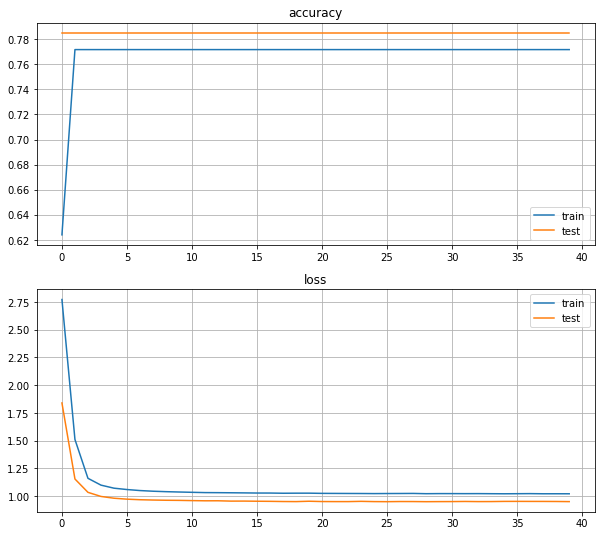

In [15]:
#plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()




plt.show()

## LSTM
- Desempeño de LSTM con una capa vs. deep RNN


In [16]:
def lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(LSTM(32, return_sequences = False))
    model.add(Dense(46, activation = 'softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [17]:
model = lstm()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          512000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                1518      
Total params: 525,934
Trainable params: 525,934
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 758 samples, validate on 326 samples
Epoch 1/40
758/758 [==============================] - 2s 3ms/sample - loss: 3.7126 - accuracy: 0.5858 - val_loss: 3.4231 - val_accuracy: 0.7853
Epoch 2/40
758/758 [==============================] - 0s 257us/sample - loss: 2.7176 - accuracy: 0.7718 - val_loss: 1.8686 - val_accuracy: 0.7853
Epoch 3/40
758/758 [==============================] - 0s 256us/sample - loss: 1.5607 - accuracy: 0.7718 - val_loss: 1.2139 - val_accuracy: 0.7853
Epoch 4/40
758/758 [==============================] - 0s 251us/sample - loss: 1.1844 - accuracy: 0.7718 - val_loss: 1.0466 - val_accuracy: 0.7853
Epoch 5/40
758/758 [==============================] - 0s 255us/sample - loss: 1.0998 - accuracy: 0.7718 - val_loss: 1.0037 - val_accuracy: 0.7853
Epoch 6/40
758/758 [==============================] - 0s 245us/sample - loss: 1.0740 - accuracy: 0.7718 - val_loss: 0.9843 - val_accuracy: 0.7853
Epoch 7/40
758/758 [==============================] - 0s 231us/sample - loss: 1.

In [19]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

272/1 - 0s - loss: 1.1993 - accuracy: 0.8272

Test acccuracy: 0.8272059


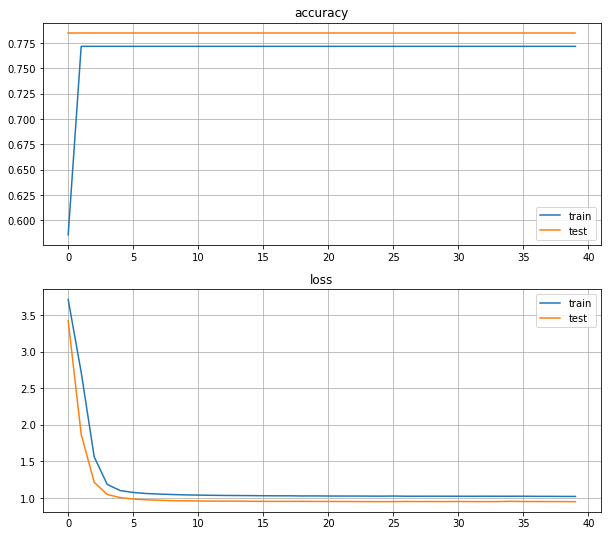

In [20]:
#plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()




plt.show()

## Deep LSTM
- LSTM cuentan inicializador 'orthogonal' por defecto

In [21]:
def deep_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(LSTM(32, return_sequences = True, recurrent_initializer='orthogonal'))
    model.add(LSTM(32, return_sequences = False, recurrent_initializer='orthogonal'))
    model.add(Dense(46, activation = 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [22]:
model = deep_lstm()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          512000    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                1518      
Total params: 534,254
Trainable params: 534,254
Non-trainable params: 0
_________________________________________________________________


In [23]:
history1 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 758 samples, validate on 326 samples
Epoch 1/40
758/758 [==============================] - 3s 4ms/sample - loss: 3.6785 - accuracy: 0.6821 - val_loss: 3.2527 - val_accuracy: 0.7853
Epoch 2/40
758/758 [==============================] - 0s 286us/sample - loss: 2.3124 - accuracy: 0.7718 - val_loss: 1.3719 - val_accuracy: 0.7853
Epoch 3/40
758/758 [==============================] - 0s 283us/sample - loss: 1.2686 - accuracy: 0.7718 - val_loss: 1.0970 - val_accuracy: 0.7853
Epoch 4/40
758/758 [==============================] - 0s 327us/sample - loss: 1.1388 - accuracy: 0.7718 - val_loss: 1.0217 - val_accuracy: 0.7853
Epoch 5/40
758/758 [==============================] - 0s 348us/sample - loss: 1.0823 - accuracy: 0.7718 - val_loss: 0.9914 - val_accuracy: 0.7853
Epoch 6/40
758/758 [==============================] - 0s 298us/sample - loss: 1.0622 - accuracy: 0.7718 - val_loss: 0.9756 - val_accuracy: 0.7853
Epoch 7/40
758/758 [==============================] - 0s 300us/sample - loss: 1.

In [24]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

272/1 - 0s - loss: 1.0245 - accuracy: 0.8824

Test acccuracy: 0.88235295


- Modificando inicializador 

In [25]:
def deep_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(LSTM(32, return_sequences = True, recurrent_initializer='glorot_uniform'))
    model.add(LSTM(32, return_sequences = False, recurrent_initializer='glorot_uniform'))
    model.add(Dense(46, activation = 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [26]:
model = deep_lstm()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          512000    
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 32)          12416     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                1518      
Total params: 534,254
Trainable params: 534,254
Non-trainable params: 0
_________________________________________________________________


In [27]:
history2 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = 40, verbose = verbose)

Train on 758 samples, validate on 326 samples
Epoch 1/40
758/758 [==============================] - 4s 5ms/sample - loss: 3.5942 - accuracy: 0.6478 - val_loss: 2.8785 - val_accuracy: 0.7853
Epoch 2/40
758/758 [==============================] - 0s 397us/sample - loss: 2.1352 - accuracy: 0.7718 - val_loss: 1.4210 - val_accuracy: 0.7853
Epoch 3/40
758/758 [==============================] - 0s 412us/sample - loss: 1.2587 - accuracy: 0.7718 - val_loss: 1.0681 - val_accuracy: 0.7853
Epoch 4/40
758/758 [==============================] - 0s 296us/sample - loss: 1.1126 - accuracy: 0.7718 - val_loss: 1.0074 - val_accuracy: 0.7853
Epoch 5/40
758/758 [==============================] - 0s 352us/sample - loss: 1.0777 - accuracy: 0.7718 - val_loss: 0.9852 - val_accuracy: 0.7853
Epoch 6/40
758/758 [==============================] - 0s 364us/sample - loss: 1.0595 - accuracy: 0.7718 - val_loss: 0.9744 - val_accuracy: 0.7853
Epoch 7/40
758/758 [==============================] - 0s 442us/sample - loss: 1.

In [28]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

272/1 - 0s - loss: 0.9204 - accuracy: 0.8934

Test acccuracy: 0.8933824


- Recurrent dropout

In [29]:
def deep_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(LSTM(32, return_sequences = True, recurrent_initializer='glorot_uniform',
                  recurrent_dropout=0.1))
    model.add(LSTM(32, return_sequences = False, recurrent_initializer='glorot_uniform',
                  recurrent_dropout=0.1))
    model.add(Dense(46, activation = 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [30]:
model = deep_lstm()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          512000    
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 32)          12416     
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 46)                1518      
Total params: 534,254
Trainable params: 534,254
Non-trainable params: 0
_________________________________________________________________


In [31]:
history3 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Train on 758 samples, validate on 326 samples
Epoch 1/40
758/758 [==============================] - 4s 5ms/sample - loss: 3.4562 - accuracy: 0.6939 - val_loss: 2.5126 - val_accuracy: 0.7853
Epoch 2/40
758/758 [==============================] - 1s 2ms/sample - loss: 1.8847 - accuracy: 0.7718 - val_loss: 1.2952 - val_accuracy: 0.7853
Epoch 3/40
758/758 [==============================] - 1s 2ms/sample - loss: 1.2168 - accuracy: 0.7718 - val_loss: 1.0422 - val_accuracy: 0.7853
Epoch 4/40
758/758 [==============================] - 1s 2ms/sample - loss: 1.0976 - accuracy: 0.7718 - val_loss: 0.9919 - val_accuracy: 0.7853
Epoch 5/40
758/758 [==============================] - 1s 2ms/sample - loss: 1.0700 - accuracy: 0.7718 - val_loss: 0.9736 - val_accuracy: 0.7853
Epoch 6/40
758/758 [==============================] - 1s 2ms/sample - loss: 1.0546 - accuracy: 0.7718 - val_loss: 0.9614 - val_accuracy: 0.7853
Epoch 7/40
758/758 [==============================] - 1s 2ms/sample - loss: 1.0440 - accur

In [32]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

272/1 - 0s - loss: 0.9561 - accuracy: 0.9118

Test acccuracy: 0.9117647


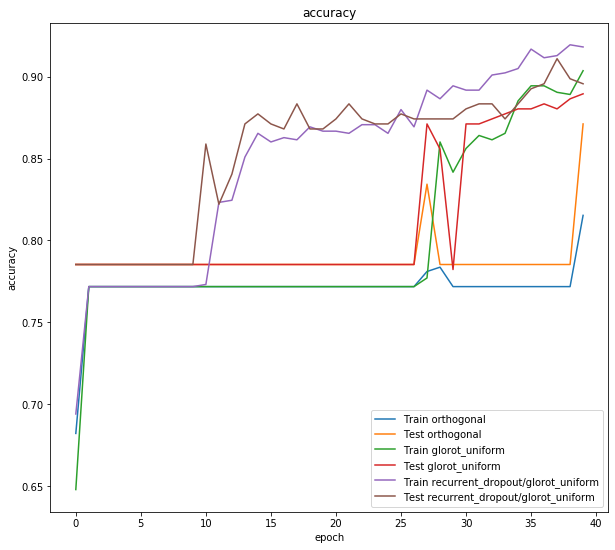

In [34]:
#plot
plt.figure(figsize=(10,9))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])


plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])


plt.legend(['Train orthogonal', 'Test orthogonal',
            'Train glorot_uniform', 'Test glorot_uniform',
            'Train recurrent_dropout/glorot_uniform', 'Test recurrent_dropout/glorot_uniform'])

plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

- Mejorar test accuracy
- Investigar que son las GRU e implementarlas
- Experimentar con diferente número de capas y neuronas, mejorar los resultados
- Experimentar otros inicializadores y diferentes valores de dropout
- Probar con otro dataset